In [ ]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
import os

: 

In [4]:
# uvoz podatkov

station_id=5001
file_path = os.path.join(r'D:\FMF magisterij\Matematika z računalnikom', f'ELES-MAS-{station_id}-2020-2023.csv.gz')
data = pd.read_csv(file_path, compression='gzip')
data = data[data['data_validity'] <= 32]
data.drop('measurement_location_inst_id', axis=1, inplace=True)
data['acquisition_timestamp'] = pd.to_datetime(data['acquisition_timestamp'], utc=True)

# preoblikovanje
new_data = data.pivot_table(index='acquisition_timestamp', columns='parameter_type', values='value').reset_index()
new_data.set_index('acquisition_timestamp', inplace=True)
new_data.drop('WIND_DIRECTION', axis=1, inplace=True)
new_data.drop('RAIN_INTENSITY', axis=1, inplace=True)


# NaN vrednosti zamenjane z naslednjo veljavno meritvijo - mogoce kaj drugega
new_data = new_data.bfill()

print('Shape of data', new_data.shape)

new_data.head()

Shape of data (271508, 5)


parameter_type,AIR_PRESSURE,AMBIENT_TEMPERATURE,RELATIVE_HUMIDITY,SOLAR_RADIATION_INTENSITY,WIND_SPEED
acquisition_timestamp,,,,,
2020-10-13 10:20:00+00:00,952.8,7.4,63.9,285.6,2.45
2020-10-13 10:25:00+00:00,952.8,7.5,62.5,262.0,2.45
2020-10-13 10:30:00+00:00,952.8,7.4,61.9,270.9,2.81
2020-10-13 10:35:00+00:00,952.8,7.5,62.2,307.4,3.28
2020-10-13 10:40:00+00:00,952.8,7.6,62.2,342.0,1.27


In [5]:
# spremenimo format v datetime
# str(new_data.index.dtype) #type je 'object', hocemo datetime
new_data.index = pd.to_datetime(new_data.index, utc=True)
str(new_data.index.dtype) # sedaj je ok

'datetime64[ns, UTC]'

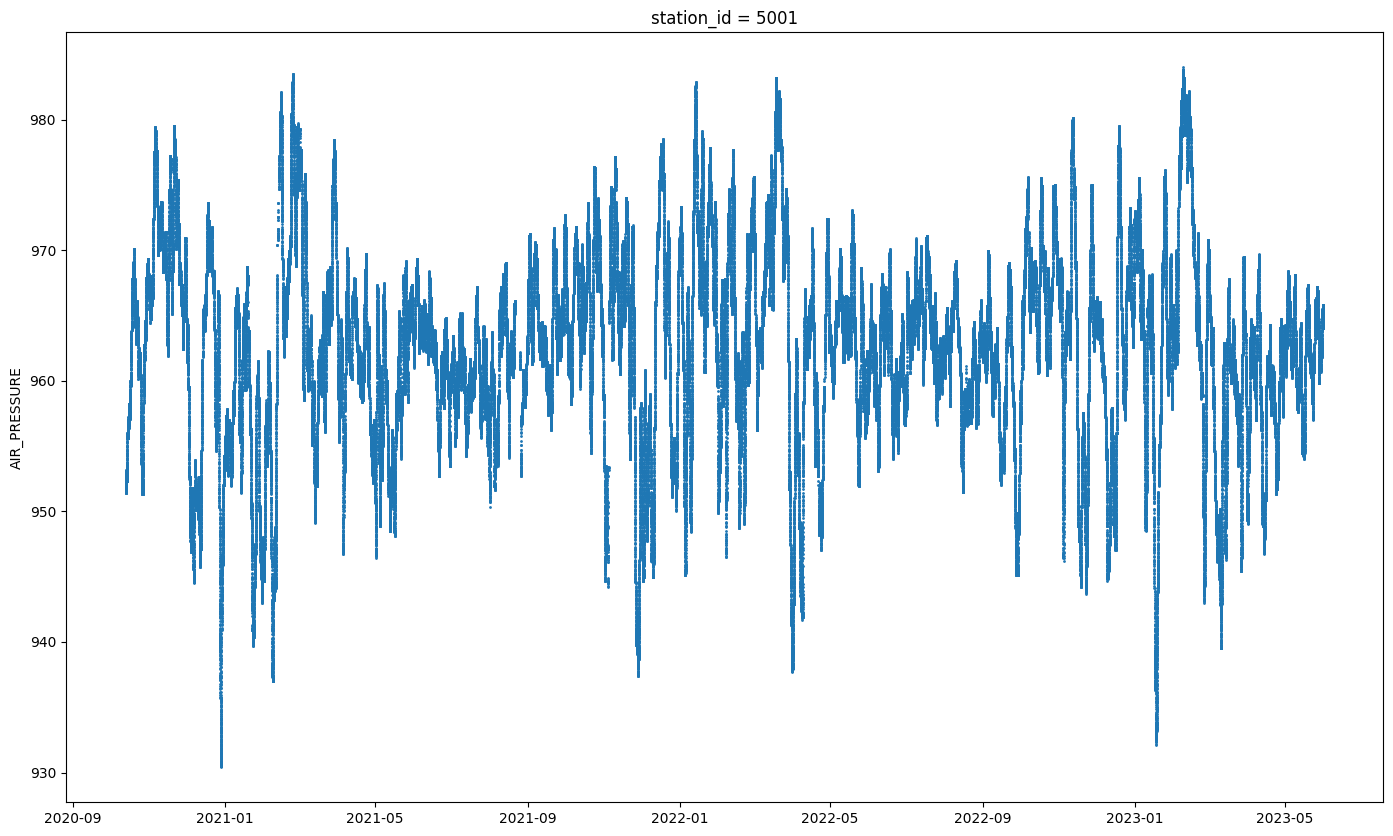

In [6]:
# plot 'AIR_PRESSURE'
fig, ax = plt.subplots(figsize=(17, 10))
ax.scatter(new_data.index, new_data['AIR_PRESSURE'],s=1)
ax.set_ylabel('AIR_PRESSURE')  
ax.set_title(f'station_id = {station_id}')  
plt.show()

In [7]:
print(new_data['AIR_PRESSURE'])

acquisition_timestamp
2020-10-13 10:20:00+00:00    952.8
2020-10-13 10:25:00+00:00    952.8
2020-10-13 10:30:00+00:00    952.8
2020-10-13 10:35:00+00:00    952.8
2020-10-13 10:40:00+00:00    952.8
                             ...  
2023-05-31 21:35:00+00:00    964.8
2023-05-31 21:40:00+00:00    964.8
2023-05-31 21:45:00+00:00    964.9
2023-05-31 21:50:00+00:00    964.9
2023-05-31 21:55:00+00:00    964.9
Name: AIR_PRESSURE, Length: 271508, dtype: float64


In [8]:
air_pressure_2020 = new_data.loc[new_data.index.year == 2020, 'AIR_PRESSURE']
print(air_pressure_2020)

acquisition_timestamp
2020-10-13 10:20:00+00:00    952.8
2020-10-13 10:25:00+00:00    952.8
2020-10-13 10:30:00+00:00    952.8
2020-10-13 10:35:00+00:00    952.8
2020-10-13 10:40:00+00:00    952.8
                             ...  
2020-12-31 23:35:00+00:00    953.6
2020-12-31 23:40:00+00:00    953.5
2020-12-31 23:45:00+00:00    953.5
2020-12-31 23:50:00+00:00    953.5
2020-12-31 23:55:00+00:00    953.5
Name: AIR_PRESSURE, Length: 22779, dtype: float64


In [9]:
# rajsi 2020 in 2021, če bo prisotna sezonskost
air_pressure_20_21 = new_data.loc[(new_data.index.year == 2020) | (new_data.index.year == 2021) , 'AIR_PRESSURE']
print(air_pressure_20_21)


acquisition_timestamp
2020-10-13 10:20:00+00:00    952.8
2020-10-13 10:25:00+00:00    952.8
2020-10-13 10:30:00+00:00    952.8
2020-10-13 10:35:00+00:00    952.8
2020-10-13 10:40:00+00:00    952.8
                             ...  
2021-12-31 23:35:00+00:00    968.9
2021-12-31 23:40:00+00:00    968.8
2021-12-31 23:45:00+00:00    968.9
2021-12-31 23:50:00+00:00    968.9
2021-12-31 23:55:00+00:00    969.0
Name: AIR_PRESSURE, Length: 123928, dtype: float64


### Statyonarity

We will check the stationarity of the data with two tests: ADF (Augmented Dickey-Fuller) and KPSS (Kwiatkowski-Phillips-Schmidt-Shin). For further analysis it would be good if the data was stationary. Stationarity indicates that the statistical properties of the data do not change over time (the time series does not have a time-dependent structure).

ADF yes, KPSS yes: statyonary

ADF no, KPSS no: non-stationary

ADF no, KPSS yes: trend stationary (remove the trend and check again)

ADF yes, KPSS no: difference stationary (differencing needs to be used and then check again)

(naredi oba)

(v porocilu napisi vec o stacionarnosti in testih, stationary = without trend and seasonal components)

Types of Stationary Series

Strict Stationary – Satisfies the mathematical definition of a stationary process. Mean, variance & covariance are not a function of time.

Seasonal Stationary – Series exhibiting seasonality.

Trend Stationary – Series exhibiting trend.

Note: Once the seasonality and trend are removed, the series will be strictly stationary.

In [10]:
# Augmented Dickey-Fuller (ADF) test for testing the stationarity of the data

import statsmodels
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC') # AIC = Akaike Information Criterion
     print("1. ADF : ",dftest[0])
     print("2. p-value : ", dftest[1]) # indicates the probability that the series has a unit root (is non-stationary)
     print("3. Number Of Lags : ", dftest[2]) # the number of lags used in the regression when determining the test statistic
     print("4. Number of observations used For ADF regression:",      dftest[3])
     print("5. critical values :" ) # critical values of the test statistic at the 1%, 5% and 10% levels
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(air_pressure_20_21)

1. ADF :  -6.5180962816668435
2. p-value :  1.058853207445213e-08
3. Number Of Lags :  71
4. Number of observations used For ADF regression: 123856
5. critical values :
	 1% :  -3.4304027986979517
	 5% :  -2.861563336246831
	 10% :  -2.566782421058968


#### Interpretation of the ADF test:

Null hypothesis: Time series has a unit root, meaning it is non-stationary. Options: reject and not reject. We want to reject

The ADF test gives a test statistic, a p-value, and critical values at different significance levels.
ADF: has to be more negative than critical levels to reject the null hypothesis at those levels of confidence (and it is)

p < 0.05 - also rejects the null hypothesis

According to the ADF test the data is likely stationary.

In [11]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for testing the stationarity of the data¸

from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test statistic','p-value','Number of lags used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical value (%s)'%key] = value
    print (kpss_output)
kpss_test(air_pressure_20_21)

Results of KPSS Test:
Test statistic             0.486315
p-value                    0.044749
Number of lags used      203.000000
Critical value (10%)       0.347000
Critical value (5%)        0.463000
Critical value (2.5%)      0.574000
Critical value (1%)        0.739000
dtype: float64


#### Interpretation of the KPSS test:

Null Hypothesis: Series is trend stationary or series has no unit root. Options: reject and not reject. We want to not reject it.

The KPSS test gives a test statistic, a p-value, and critical values at different significance levels.
Test statistic has to be less than critical value to be rejected at that level.

p < 0.05 - rejects the null hypothesis

Test statistic exceeds the critical value at some of the levels (10%, 5%) and p-value is less than 0.05, so we can conclude that there is a statistically significant evidence that the data is non-stationary.

According to the KPSS test the data is likely non-stationary. 

This contradicts the result of ADF test.

It is trend-stationary. Let's remove the trend and check again. Removing the trend can be done by differencing.

In [12]:
# differencing
air_pressure_20_21_diff = air_pressure_20_21.diff().dropna()

In [13]:
# ADF on the differenced data
ad_test(air_pressure_20_21_diff)


1. ADF :  -34.396508751174636
2. p-value :  0.0
3. Number Of Lags :  67
4. Number of observations used For ADF regression: 123859
5. critical values :
	 1% :  -3.430402797419083
	 5% :  -2.861563335681595
	 10% :  -2.5667824207581122


In [14]:
# KPSS on the differenced data
kpss_test(air_pressure_20_21_diff)

Results of KPSS Test:
Test statistic             0.008478
p-value                    0.100000
Number of lags used      176.000000
Critical value (10%)       0.347000
Critical value (5%)        0.463000
Critical value (2.5%)      0.574000
Critical value (1%)        0.739000
dtype: float64


ADF and KPSS both suggest the differenced data is stationary so we can proceed with fitting the models and forecasting.

#### ARIMA

ARIMA (Auto-Regressive Integrated Moving Average)  is a statistical analysis model used to forecast future points in time series data. It combines three main components: autoregression (AR), differencing (I), and moving average (MA).

- **AR (Auto-Regressive):** This part predicts future values based on past values. It assumes a relationship between an observation and a number of lagged observations.

- **I (Integrated):** To make the time series stationary, which means its statistical properties such as mean and variance are constant over time, differencing is used. This involves subtracting the previous observation from the current observation.

- **MA (Moving Average):** This aspect models the error of the model as a combination of past errors in a moving average model.

The ARIMA model is characterized by three parameters: _p_, _d_ and _q_. Paramether _p_ is the number of lag observations in the model (AR), _d_ is the degree of differencing (I), and _q_ is the size of the moving average window (MA).

ARIMA models are widely used in economics, finance, and business for forecasting future trends from historical time series data. They are especially useful because they can handle data that shows non-stationary patterns and can incorporate the effects of past values and past errors into the model.

In [9]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(air_pressure_20_21, trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-271771.125, Time=127.99 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-259576.321, Time=20.79 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-261223.654, Time=17.58 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-260879.354, Time=22.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-259578.027, Time=9.77 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-271946.167, Time=138.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-262580.634, Time=26.85 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-271708.341, Time=97.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-271963.967, Time=170.43 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-263883.724, Time=55.37 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-272035.300, Time=163.46 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-271900.033, Time=222.34 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-271776.627, Time=210.23 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=

In [25]:
# stepwise_fit1 = auto_arima(air_pressure_20_21, start_p=1, start_q=1,
                          #max_p=3, max_q=3, m=12,
                          #start_P=0, seasonal=True,
                          #d=None, D=1, trace=True,
                          #error_action='ignore',  
                          #suppress_warnings=True, 
                          #stepwise=False, n_jobs=-1)
# tega racunalnik ne uspe obdelati, spremeni

The best model according to the fitting above is ARIMA(2,1,3).

ARIMA(p,d,q)

p=2: We will test if this value is okay by plotting the Partial Autocorrelation Function (PACF) which helps to indetify the AR component (p).

d=1: Makes sense according to the stationarity tests (ADF, KPSS) we did earlier. We differenced once (d=1) and stationarity was gone.

q=3: We will test if this value is okay by plotting the Autocorrelation Function (ACF) which helps to indetify the MA component (q).

In [15]:
# residuals

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(air_pressure_20_21, order=(2,1,3))
fit = model.fit()
residuals = fit.resid


In [16]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

# Check stationarity of your residuals
result = adfuller(residuals)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
if result[1] > 0.05:
    print("Residuals are not stationary. Consider differencing.")
else:
    print("Residuals are stationary.")

# Function to fit ARMA model and return AIC
def fit_arma(residuals, p, q):
    model = ARIMA(residuals, order=(p, 1, q))
    model_fit = model.fit()
    return model_fit.aic

# Grid search over possible p, q values
best_aic = np.inf
best_order = None
for p in range(5):
    for q in range(5):
        try:
            aic = fit_arma(residuals, p, q)
            if aic < best_aic:
                best_aic = aic
                best_order = (p, q)
        except Exception as e:
            continue

print(f'Best ARMA({best_order[0]}, {best_order[1]}) Model AIC: {best_aic}')

# s tem je kr en fit, AIC je prevelik. ostanimo pri ARIMA(2,1,3)

ADF Statistic: -46.452684
p-value: 0.000000
Residuals are stationary.
Best ARMA(0, 1) Model AIC: 598591.0909856936


In [ ]:
# PACF plot

#from statsmodels.graphics.tsaplots import plot_pacf

#plot_pacf(residuals, lags=40, alpha=0.05)
#plt.title('PACF of Residuals') 
#plt.show()

In [ ]:
# ACF plot

#from statsmodels.graphics.tsaplots import plot_acf

#plot_acf(air_pressure_20_21_diff.dropna(), lags=288)
#plt.show()

In [22]:
# forecasting 10 steps into the future

forecast_result = fit.get_forecast(steps=10)
forecast_values = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

print("Forecasted values:", forecast_values)
print("95% Confidence intervals of forecasts:", conf_int)



Forecasted values: 123928    968.973901
123929    968.958926
123930    968.940821
123931    968.926556
123932    968.909353
123933    968.895764
123934    968.879418
123935    968.866473
123936    968.850943
123937    968.838612
Name: predicted_mean, dtype: float64
95% Confidence intervals of forecasts:         lower AIR_PRESSURE  upper AIR_PRESSURE
123928          968.815670          969.132132
123929          968.732610          969.185243
123930          968.656285          969.225357
123931          968.587599          969.265512
123932          968.518636          969.300070
123933          968.454298          969.337229
123934          968.388313          969.370524
123935          968.325959          969.406988
123936          968.261569          969.440316
123937          968.200326          969.476897


In [28]:
# testing the forecast

print(forecast_values)
air_pressure = new_data['AIR_PRESSURE']
actual_values = air_pressure['2022'].head(10)
print(actual_values)

# absolute accuracy
def absolute_accuracy(actual, forecast):
    absolute_errors = [abs(a - p) for a, p in zip(actual, forecast)]
    mean_absolute_error = sum(absolute_errors) / len(absolute_errors)
    
    return absolute_errors, mean_absolute_error

absolute_accuracy(actual_values, forecast_values)





123928    968.973901
123929    968.958926
123930    968.940821
123931    968.926556
123932    968.909353
123933    968.895764
123934    968.879418
123935    968.866473
123936    968.850943
123937    968.838612
Name: predicted_mean, dtype: float64
acquisition_timestamp
2022-01-01 00:35:00+00:00    969.4
2022-01-01 00:40:00+00:00    969.5
2022-01-01 00:45:00+00:00    969.6
2022-01-01 00:50:00+00:00    969.7
2022-01-01 00:55:00+00:00    969.7
2022-01-01 01:00:00+00:00    969.7
2022-01-01 01:05:00+00:00    969.8
2022-01-01 01:10:00+00:00    969.8
2022-01-01 01:15:00+00:00    969.8
2022-01-01 01:20:00+00:00    969.8
Name: AIR_PRESSURE, dtype: float64


([0.4260990372061997,
  0.5410736072296913,
  0.6591791660096078,
  0.7734444205435693,
  0.79064716479445,
  0.8042364349055333,
  0.920581591923451,
  0.9335266590496758,
  0.9490571780878554,
  0.9613883450450658],
 0.7759233604795099)

In [30]:
# relative accuracy of the prediction above

def relative_accuracy(actual, forecast):
    relative_errors = []
    for a, p in zip(actual, forecast):
        if a != 0: 
            error = abs(p - a) / abs(a)
            relative_errors.append(error * 100)
        else:
            relative_errors.append(0) 

    mean_relative_error = sum(relative_errors) / len(relative_errors)
    
    return relative_errors, mean_relative_error

relative_accuracy(actual_values, forecast_values)

# 8% je rezultat, ni ravno optimalno


([0.04395492440748914,
  0.05580955206082427,
  0.06798464995973677,
  0.0797612066147849,
  0.08153523407182117,
  0.0829366231726857,
  0.09492489089744804,
  0.09625970912040377,
  0.09786112374591208,
  0.09913264023974694],
 0.08001605542908527)

In [45]:
print(data.index)

Index([   7644,    7645,    7646,    7647,    7648,    7651,    7652,    7653,
          7654,    7655,
       ...
       1908246, 1908247, 1908248, 1908249, 1908250, 1908251, 1908252, 1908253,
       1908254, 1908255],
      dtype='int64', length=1886286)


In [47]:
# testing framework TO NI OK

def test_framework(model, data, all_data, predicted_steps, acceptable_error_margin):
    predictions = model.predict(data, predicted_steps)
    start = len(data) + 1
    end 
    future_times = pd.date_range(start=all_data[start], periods=predicted_steps + 1, closed='right')
    actual_data =  all_data.loc[future_times] # tok korakov naprej od podatkov s katerimi smo ocenili model
    if len(predictions) != len(actual_data):
        raise ValueError("NO.")
    differences = np.abs(actual_data-predictions)
    error = np.mean(differences <= acceptable_error_margin)
    return error

test_framework(fit, air_pressure_20_21, air_pressure, int(2*60/5), 0.05)


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'